Цель данного проекта проанализировать совершенные покупки и ответить на следующие вопросы:

 - Сколько у нас пользователей, которые совершили покупку только один раз? 

 -  Сколько заказов в месяц в среднем не доставляется по разным причинам?

 -  По каждому товару определить, в какой день недели товар чаще всего покупается.

 -  Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

 -  Проведение когортного анализа пользователей. В период с января по декабрь необходимо выявить когорту с самым высоким retention на 3й месяц.

 -  Построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

### olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей

__customer_id__ — позаказный идентификатор пользователя

__customer_unique_id__ —  уникальный идентификатор пользователя  (аналог номера паспорта)

__customer_zip_code_prefix__ —  почтовый индекс пользователя

__customer_city__ —  город доставки пользователя

__customer_state__ —  штат доставки пользователя

### olist_orders_dataset.csv —  таблица заказов

__order_id__ —  уникальный идентификатор заказа (номер чека)

__customer_id__ —  позаказный идентификатор пользователя

__order_status__ —  статус заказа

__order_purchase_timestamp__ —  время создания заказа

__order_approved_at__ —  время подтверждения оплаты заказа

__order_delivered_carrier_date__ —  время передачи заказа в логистическую службу

__order_delivered_customer_date__ —  время доставки заказа

__order_estimated_delivery_date__ —  обещанная дата доставки

### olist_order_items_dataset.csv —  товарные позиции, входящие в заказы

__order_id__ —  уникальный идентификатор заказа (номер чека)

__order_item_id__ —  идентификатор товара внутри одного заказа

__roduct_id__ —  ид товара (аналог штрихкода)

__seller_id__ — ид производителя товара

__shipping_limit_date__ —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

__price__ —  цена за единицу товара

__freight_value__ —  вес товара


### Уникальные статусы заказов в таблице olist_orders_dataset:

 - created —  создан
 - approved —  подтверждён
 - invoiced —  выставлен счёт
 - processing —  в процессе сборки заказа
 - shipped —  отгружен со склада
 - delivered —  доставлен пользователю
 - unavailable —  недоступен
 - canceled —  отменён

### Предобработка данных

In [223]:
import pandas as pd
import pandasql as ps
from datetime import timedelta
import matplotlib.pyplot as plt

In [224]:
olist_customers_datase    = pd.read_csv('C:/Users/Константин/Downloads/olist_customers_dataset.csv')
olist_orders_dataset      = pd.read_csv('C:/Users/Константин/Downloads/olist_orders_dataset.csv')
olist_order_items_dataset = pd.read_csv('C:/Users/Константин/Downloads/olist_order_items_dataset.csv')

In [225]:
olist_customers_datase.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [226]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [227]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


  ### Сколько у нас пользователей, которые совершили покупку только один раз?
  __Пользователь совершает покупку в момент оплаты, поэтому отбираем сатусы : delivered, shipped, invoiced, processing, approved__     

In [228]:
# Объединяю таблицы
df1 = olist_customers_datase.merge(olist_orders_dataset,  on='customer_id')

In [229]:
# Отбираю только нужные статусы
df1 = df1.loc[df1['order_status']. isin(['delivered', 'shipped', 'invoiced', 'processing', 'approved'])]

In [230]:
# Считаю количество покупок для каждого пользователя
count_purchase = df1.groupby('customer_unique_id', as_index=False)\
                    .agg({'customer_zip_code_prefix': 'count'})\
                    .rename(columns={'customer_zip_code_prefix': 'count_purchase'})\
                    .sort_values('count_purchase') 

In [231]:
count_purchase.head()

,customer_unique_id,count_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,1
62859,a931e9c8a672ff5527de39785fa58673,1
62858,a9312d3f089577687589a60c7955baa5,1
62857,a9311df21a0a446cd8a0a749d08c77ac,1
62856,a930016dbc02c5ec1f9703a25414aabb,1


In [232]:
# Ищу пользователей, совершивших только одну покупку
only_one_purchase = count_purchase.query('count_purchase==1')
only_one_purchase.shape[0]

92099

__92099 ползователей совершили только одну покупку__

### Сколько заказов в месяц в среднем не доставляется по разным причинам?

   __Товар может быть не доставлен по двум причинам unavailable(недоступен), canceled(отменен). Поэтому будем работать только с этими статусами__

In [233]:
# Отбираю необходимы статусы
df2 = olist_orders_dataset.loc[olist_orders_dataset['order_status']. isin(['canceled', 'unavailable'])]

In [234]:
# Меняю тип данных на datetime
df2[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date']] = df2[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date']].apply (pd.to_datetime )

C:\Users\Константин\AppData\Local\Temp\ipykernel_3996\1292128020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date']] = df2[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date']].apply (pd.to_datetime )


In [235]:
# Перевожу колонку order_purchase_timestamp к началу месяца
df2["order_purchase_timestamp"] = df2["order_purchase_timestamp"].astype("datetime64[M]")

C:\Users\Константин\AppData\Local\Temp\ipykernel_3996\3069439926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["order_purchase_timestamp"] = df2["order_purchase_timestamp"].astype("datetime64[M]")


In [236]:
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-01,2017-11-16 15:26:57,NaT,NaN,2017-12-05 00:00:00
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-01,2018-08-07 04:10:26,NaT,NaN,2018-08-14 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-01,2018-01-31 14:23:50,NaT,NaN,2018-02-16 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-01,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-01,2017-08-17 00:15:18,NaT,NaN,2017-09-05 00:00:00


In [237]:
# Считаю количество отказов в месяц по разным причинам
count_refusal_by_month = df2.groupby(['order_status', 'order_purchase_timestamp'], as_index=False)\
                            .agg({'customer_id': 'count'})\
                            .rename(columns={'customer_id':'count_refusal'})\
                            .sort_values('order_purchase_timestamp')

In [238]:
count_refusal_by_month.head()

,order_status,order_purchase_timestamp,count_refusal
0,canceled,2016-09-01,2
1,canceled,2016-10-01,24
24,unavailable,2016-10-01,7
2,canceled,2017-01-01,3
25,unavailable,2017-01-01,10


In [239]:
# Исключаю 2 месяца из выборки т.к. они были неполные
count_refusal_by_month = count_refusal_by_month.loc[((count_refusal_by_month['order_purchase_timestamp'] != '2016-09-01') & 
                                                     (count_refusal_by_month['order_purchase_timestamp' ] != '2018-10-01'))]

In [240]:
# Считаю сколько раз в среднем в месяц пользователи не получали товар
AVG_refusal_by_month = count_refusal_by_month.groupby('order_status', as_index=False)\
                                             .agg({'count_refusal': 'mean'})\
                                             .rename(columns={'count_refusal': 'avg_refusal'})

In [241]:
AVG_refusal_by_month

,order_status,avg_refusal
0,canceled,28.136364
1,unavailable,29.000000


### По каждому товару определить, в какой день недели товар чаще всего покупается.

In [242]:
# Объединяю 2 таблицы для дальнейших расчетов

df3 = olist_orders_dataset.merge(olist_order_items_dataset,  on='order_id')

In [243]:
# Для дальнейших расчетов исключаю заказы со статусом: canceled и unavailable

df3 = df3.loc[((df3['order_status'] != 'canceled') & 
               (df3['order_status' ] != 'unavailable'))]

In [244]:
# Меняю тип данных колонки 'order_purchase_timestamp' на 'datetime'

df3['order_purchase_timestamp'] = df3['order_purchase_timestamp'].apply (pd.to_datetime)

In [245]:
# Создаю новую колонку с днями недели

df3['day_of_week'] = df3['order_purchase_timestamp'].dt.day_name()

In [246]:
df3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday


In [247]:
# Считаю количество покупок каждого товара по дням недели

count_product_by_day = df3.groupby(['day_of_week', 'product_id'], as_index=False)\
                          .agg({'order_id': 'count'})\
                          .rename(columns=({'order_id': 'count_product'}))\
                          .sort_values('count_product', ascending=False)

In [248]:
# Определяю, в какой день недели товар чаще всего покупается.
query = '''SELECT 
                day_of_week,
                product_id,
                MAX(count_product) as max_cnt
            FROM count_product_by_day
            GROUP BY product_id  
            ORDER BY max_cnt DESC
            '''
day_of_max_cnt = ps.sqldf(query)
day_of_max_cnt.head()

,day_of_week,product_id,max_cnt
0,Wednesday,422879e10f46682990de24d770e7f83d,93
1,Monday,99a4788cb24856965c36a24e339b6058,92
2,Thursday,aca2eb7d00ea1a7b8ebd4e68314663af,89
3,Tuesday,53b36df67ebb7c41585e8d54d6772e08,76
4,Thursday,389d119b48cf3043d311335e499d9c6b,67


### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

In [249]:
# Объединяю таблицы для дальнейших расчетов
df4 = olist_orders_dataset.merge(olist_customers_datase, on = 'customer_id')

In [250]:
# Отбираю необходимые статусы
df4 = df4.loc[df4['order_status']. isin(['delivered', 'shipped', 'invoiced', 'processing', 'approved'])]

In [251]:
# Меняю тип данных колонки 'order_purchase_timestamp'
df4['order_purchase_timestamp'] = df4['order_purchase_timestamp'].apply (pd.to_datetime)

In [252]:
# Добавляю колонку начала месяца для дальнейших расчетов
df4["start_month"] = df4["order_purchase_timestamp"].astype("datetime64[M]")

In [253]:
# Исключаю 2 месяца для более корректных расчетов, так как они не полные
df4 = df4.loc[((df4['start_month'] != '2016-09-01') &
               (df4['start_month' ] != '2018-10-01'))]

In [254]:
# Добовляю еще одну колонку с номером месяца
df4['month'] = df4['start_month'].dt.month

In [255]:
df4.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,start_month,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-01,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-01,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-01,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-01,2


In [256]:
# Произвожу расчеты (считаю среднее количество покупок по каждому пользователю в неделю, отдельно по месяцам)
query = '''  
                   SELECT
                       customer_unique_id,
                       start_month,
                       cnt_buying/count_weeks as avg_buy_by_month
                   FROM 
                           (
                           SELECT 
                                customer_unique_id,
                                DATE(start_month) as start_month,
                                COUNT() as cnt_buying,
                                CASE
                                    WHEN month=1 or month=3 or month=5 or month=7 or month=8 or month=10 or month=12 THEN 4.42
                                    WHEN month=4 or month=6 or month=9 or month=11 THEN 4.28
                                    ELSE 4
                                END as count_weeks
                            FROM df4
                            GROUP BY
                                    start_month,
                                    customer_unique_id
                            )
            '''
select = ps.sqldf(query)
select

,customer_unique_id,start_month,avg_buy_by_month
0,0032c76b20340da25249092a268ce66c,2016-10-01,0.226244
1,01f156677184504063bd19739f924af1,2016-10-01,0.226244
2,0313291a6f4f16df04dcf819d88c38ef,2016-10-01,0.226244
3,0636d30c77f0f9cfad81f1c9b58c791f,2016-10-01,0.226244
4,06bdfbbe1857c3c925ec81abfb1c9666,2016-10-01,0.226244
...,...,...,...
96857,ffc4e1cd8aa220763480d0a18157c45d,2018-08-01,0.226244
96858,ffe204b1bb8026741b839085b2fd10f2,2018-08-01,0.226244
96859,ffec490ab531184a483efe2eedd68908,2018-08-01,0.226244
96860,fff96bc586f78b1f070da28c4977e810,2018-08-01,0.226244


### Когортный анализ пользователей

In [257]:
# Объединяю 2 таблицы
df5 = olist_customers_datase.merge(olist_orders_dataset, on = 'customer_id')

In [258]:
# Исключаю заказы со статусами: "canceled" и "unavailable"
df5 = df5.loc[((df5['order_status'] != 'canceled') & 
               (df5['order_status' ] != 'unavailable'))]

In [259]:
# Меняю тип данных на datetime
df5['order_purchase_timestamp'] = df5['order_purchase_timestamp'].apply (pd.to_datetime)

In [260]:
df5.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [261]:
# Отбираю нужные колонки
df5 = df5[['customer_unique_id', 'order_purchase_timestamp', 'order_status']]

In [262]:
# Добавляю колонку с месяцем покупки
df5["month"] = df5["order_purchase_timestamp"].astype("datetime64[M]")

In [263]:
df5.head()

,customer_unique_id,order_purchase_timestamp,order_status,month
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,delivered,2017-05-01
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,delivered,2018-01-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,delivered,2018-05-01
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,delivered,2018-03-01
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,delivered,2018-07-01


In [264]:
# Ищу меясяц первой покупки
first_buy = df5.groupby('customer_unique_id')\
               .agg({'month':'min'})\
               .rename(columns={'month':'first_month'})

In [265]:
first_buy.head()

,first_month
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01
0000f46a3911fa3c0805444483337064,2017-03-01
0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
0004aac84e0df4da2b147fca70cf8255,2017-11-01


In [266]:
# Объединяю таблички
first_buy_with_buying = df5.merge(first_buy, on = 'customer_unique_id')

In [267]:
first_buy_with_buying.head()

,customer_unique_id,order_purchase_timestamp,order_status,month,first_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,delivered,2017-05-01,2017-05-01
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,delivered,2018-01-01,2018-01-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,delivered,2018-05-01,2018-05-01
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,delivered,2018-03-01,2018-03-01
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,delivered,2018-07-01,2018-07-01


In [268]:
# Добавляю колонку с активностью пользователя 
first_buy_with_buying['active'] = first_buy_with_buying.month > first_buy_with_buying.first_month

In [269]:
first_buy_with_buying.head()

,customer_unique_id,order_purchase_timestamp,order_status,month,first_month,active
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,delivered,2017-05-01,2017-05-01,False
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,delivered,2018-01-01,2018-01-01,False
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,delivered,2018-05-01,2018-05-01,False
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,delivered,2018-03-01,2018-03-01,False
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,delivered,2018-07-01,2018-07-01,False


In [270]:
user = first_buy_with_buying[['customer_unique_id', 'first_month']]

In [271]:
user.head()

,customer_unique_id,first_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05-01
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-01
3,259dac757896d24d7702b9acbbff3f3c,2018-03-01
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-01


In [272]:
# Ищу перввый и последний меяц
min_date = first_buy_with_buying.month.min()
max_date = first_buy_with_buying.month.max()

In [273]:
# Создаю таблицу с месяцами
months = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS'))

In [274]:
months.columns = ['month']

In [275]:
user['key'] = 1
months['key'] = 1

C:\Users\Константин\AppData\Local\Temp\ipykernel_3996\2471633281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user['key'] = 1


In [276]:
# Объединяю таблички
template = user.merge(months,on='key')[['customer_unique_id','first_month','month']]

In [277]:
template.head()

,customer_unique_id,first_month,month
0,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2016-09-01
1,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2016-10-01
2,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2016-11-01
3,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2016-12-01
4,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-01-01


In [278]:
# Ищу месяца актиности
trans_month = first_buy_with_buying.groupby(['customer_unique_id','month'])['active'].sum().reset_index()

In [279]:
trans_month.head()

,customer_unique_id,month,active
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,0
2,0000f46a3911fa3c0805444483337064,2017-03-01,0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,0


In [280]:
# Объединяю таблички
report = template.merge(trans_month,on=['customer_unique_id','month'],how='left')

In [281]:
report.head()

,customer_unique_id,first_month,month,active
0,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2016-09-01,NaN
1,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2016-10-01,NaN
2,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2016-11-01,NaN
3,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2016-12-01,NaN
4,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-01-01,NaN


In [282]:
report['active'] = (report['active'] > 0)*1

In [283]:
report.head()

,customer_unique_id,first_month,month,active
0,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2016-09-01,0
1,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2016-10-01,0
2,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2016-11-01,0
3,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2016-12-01,0
4,861eff4711a542e4b93843c6dd7febb0,2017-05-01,2017-01-01,0


In [284]:
import numpy as np

In [285]:
# Добавляю колонку с номером месяца
report['lifetime'] = ((report['month'] - report['first_month'])/np.timedelta64(1, 'M')).round().astype(int)

In [286]:
report = report.query('lifetime>0')

In [287]:
# Ищу retention
retention = report.pivot_table(index='first_month',columns='lifetime',values='active',aggfunc='mean')

In [288]:
retention

lifetime,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
first_month,,,,,,,,,,,,,,,,,,,,,
2016-09-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.006601,0.000000,0.000000,0.006601,0.000000,...,0.006601,0.000000,0.006601,0.0,0.013201,0.016502,0.0,0.0,0.0,NaN
2016-12-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN
2017-01-01,0.008526,0.004872,0.002436,0.009744,0.002436,0.007308,0.003654,0.003654,0.000000,0.009744,...,0.002436,0.004872,0.007308,0.0,0.002436,0.000000,NaN,NaN,NaN,NaN
2017-02-01,0.004525,0.005656,0.002828,0.007919,0.002262,0.005090,0.003959,0.002262,0.003959,0.002828,...,0.001131,0.001131,0.005656,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
2017-03-01,0.011029,0.007721,0.009926,0.007721,0.003309,0.003309,0.006250,0.007721,0.001471,0.008456,...,0.005515,0.001471,0.003309,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,0.011880,0.004506,0.003687,0.006145,0.004916,0.007374,0.005735,0.005735,0.003277,0.004916,...,0.001639,0.002868,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,0.014823,0.013764,0.013764,0.011117,0.012705,0.012970,0.002912,0.005558,0.007941,0.005294,...,0.008205,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,0.009135,0.007613,0.008222,0.005481,0.007613,0.007308,0.004872,0.002436,0.004568,0.006699,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

In [289]:
# Объединяю все три таблицы
df6 = olist_order_items_dataset.merge(olist_orders_dataset, on = 'order_id')
df6 = df6.merge(olist_customers_datase, on = 'customer_id')

In [290]:
df6 = df6[['order_id', 'product_id', 'price', 'customer_id', 'order_status', 'order_purchase_timestamp', 'customer_unique_id']]

In [291]:
# Исключаю заказы со статусами: "canceled" и "unavailable"
df6 = df6.loc[((df6['order_status'] != 'canceled') & 
               (df6['order_status' ] != 'unavailable'))]

In [292]:
# Меняю тип данных на datetime
df6['order_purchase_timestamp'] = df6['order_purchase_timestamp'].apply (pd.to_datetime)

In [293]:
# Считаю общую прибыль каждого клиента
task1 = '''SELECT 
                order_id,
                customer_unique_id,
                SUM(price) as total_sum
            FROM df6
            GROUP BY order_id, customer_unique_id
            '''
df7 = ps.sqldf(task1)
df7.head()

,order_id,customer_unique_id,total_sum
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,199.90


In [294]:
# Добавляю колонку с общей прибылью
task2 = '''SELECT 
                df6.*,
                df7.total_sum
            FROM df7
            LEFT JOIN df6 ON df6.order_id = df7.order_id AND df6.customer_unique_id= df7.customer_unique_id
            ORDER BY df7.total_sum DESC

            '''
df8 = ps.sqldf(task2)
df8.head()

,order_id,product_id,price,customer_id,order_status,order_purchase_timestamp,customer_unique_id,total_sum
0,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52.000000,0a0a92112bd4c708ca5fde585afaa872,13440.0
1,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52.000000,0a0a92112bd4c708ca5fde585afaa872,13440.0
2,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52.000000,0a0a92112bd4c708ca5fde585afaa872,13440.0
3,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52.000000,0a0a92112bd4c708ca5fde585afaa872,13440.0
4,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52.000000,0a0a92112bd4c708ca5fde585afaa872,13440.0


In [295]:
# Удаляю лишние строки
df8 = df8.drop_duplicates()

In [296]:
# Считаю количество заказов каждого клиента, ищу первую и последнюю дату заказа
task3 = '''SELECT 
                customer_unique_id,
                total_sum,
                COUNT(customer_id) as cnt_orders,
                MIN(order_purchase_timestamp) as min_date,
                MAX(order_purchase_timestamp) as max_date
            FROM df8
            GROUP BY customer_unique_id
            ORDER BY cnt_orders DESC

            '''
df9 = ps.sqldf(task3)
df9.head()

,customer_unique_id,total_sum,cnt_orders,min_date,max_date
0,8d50f5eadf50201ccdcedfb9e2ac8455,23.40,16,2017-05-15 23:30:03.000000,2018-08-20 19:14:26.000000
1,3e43e6105506432c953e165fb2acf44c,109.90,13,2017-09-18 18:53:15.000000,2018-02-27 18:36:39.000000
2,ca77025e7201e3b30c44b472ff346268,74.99,9,2017-10-09 12:34:39.000000,2018-06-01 11:38:29.000000
3,1b6c7548a2a1f9037c1fd3ddfed95f33,152.99,9,2017-11-13 16:44:41.000000,2018-02-14 13:22:12.000000
4,c8ed31310fc440a3f8031b177f9842c3,1138.30,8,2018-08-12 02:11:20.000000,2018-08-12 02:11:20.000000


In [297]:
# Меняю тип данных столбцов 'max_date' и 'min_date'
df9[['max_date', 'min_date']] = df9[['max_date', 'min_date']].apply (pd.to_datetime)

In [298]:
# Ввожу дату, которая будет использоваться в качестве ориентира для подсчета Recency баллов.
NOW = df9['max_date'].max() + timedelta(days=1)

In [299]:
# Добавляю колонку с количеством дней прошедших с последнего заказа
df9['DaysSinceOrder'] = df9['max_date'].apply(lambda x: (NOW - x).days)

In [300]:
# Переименовываю датафрейм и колонки
task4 = '''SELECT 
                customer_unique_id,
                total_sum as Monetary,
                cnt_orders as Frequency,
                DaysSinceOrder as Recency
            FROM df9

            '''
RFM = ps.sqldf(task4)
RFM.head()

,customer_unique_id,Monetary,Frequency,Recency
0,8d50f5eadf50201ccdcedfb9e2ac8455,23.40,16,14
1,3e43e6105506432c953e165fb2acf44c,109.90,13,188
2,ca77025e7201e3b30c44b472ff346268,74.99,9,94
3,1b6c7548a2a1f9037c1fd3ddfed95f33,152.99,9,201
4,c8ed31310fc440a3f8031b177f9842c3,1138.30,8,23


In [301]:
# Использую метод квинтилей
quintiles = RFM[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 388.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.0, 0.4: 68.0, 0.6: 107.89, 0.8: 176.99}}

In [302]:
# Пишу методы для присвоения рангов от 1 до 5

def r_score(x):
    if   x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if   x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  
    

def f_score(x):
    if   x <= 1 :
        return 1
    elif x <= 3 :
        return 2
    elif x <= 6 :
        return 3
    elif x <= 10 :
        return 4
    else:
        return 5
        

In [303]:
# Добавляю колонки с оценками 
RFM['R'] = RFM['Recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['Frequency'].apply(lambda x: f_score(x))
RFM['M'] = RFM['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [304]:
RFM.head()

,customer_unique_id,Monetary,Frequency,Recency,R,F,M
0,8d50f5eadf50201ccdcedfb9e2ac8455,23.40,16,14,5,5,1
1,3e43e6105506432c953e165fb2acf44c,109.90,13,188,3,5,4
2,ca77025e7201e3b30c44b472ff346268,74.99,9,94,5,4,3
3,1b6c7548a2a1f9037c1fd3ddfed95f33,152.99,9,201,3,4,4
4,c8ed31310fc440a3f8031b177f9842c3,1138.30,8,23,5,4,5


In [305]:
# Добавляю колонку RFM_Score
RFM['RFM_Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM.head()

,customer_unique_id,Monetary,Frequency,Recency,R,F,M,RFM_Score
0,8d50f5eadf50201ccdcedfb9e2ac8455,23.40,16,14,5,5,1,551
1,3e43e6105506432c953e165fb2acf44c,109.90,13,188,3,5,4,354
2,ca77025e7201e3b30c44b472ff346268,74.99,9,94,5,4,3,543
3,1b6c7548a2a1f9037c1fd3ddfed95f33,152.99,9,201,3,4,4,344
4,c8ed31310fc440a3f8031b177f9842c3,1138.30,8,23,5,4,5,545


In [306]:
# Я собираюсь работать с 10 сегментами на основе показателей R и F. 
segt_map = {
    r'[1-2][1-2]' : 'hibernating',
    r'[1-2][3-4]' : 'at risk',
    r'[1-2]5'     : 'can\'t loose',
    r'3[1-2]'     : 'about to sleep',
    r'33'         : 'need attention',
    r'[3-4][4-5]' : 'loyal customers',
    r'41'         : 'promising',
    r'51'         : 'new customers',
    r'[4-5][2-3]' : 'potential loyalists',
    r'5[4-5]'     : 'champions'
}

RFM['Segment'] = RFM['R'].map(str) + RFM['F'].map(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)
RFM.head()

,customer_unique_id,Monetary,Frequency,Recency,R,F,M,RFM_Score,Segment
0,8d50f5eadf50201ccdcedfb9e2ac8455,23.40,16,14,5,5,1,551,champions
1,3e43e6105506432c953e165fb2acf44c,109.90,13,188,3,5,4,354,loyal customers
2,ca77025e7201e3b30c44b472ff346268,74.99,9,94,5,4,3,543,champions
3,1b6c7548a2a1f9037c1fd3ddfed95f33,152.99,9,201,3,4,4,344,loyal customers
4,c8ed31310fc440a3f8031b177f9842c3,1138.30,8,23,5,4,5,545,champions


In [307]:
RFM.Segment.value_counts()

hibernating            37827
about to sleep         18979
new customers          17883
promising              17767
potential loyalists     2402
at risk                   86
need attention            29
champions                  5
loyal customers            5
Name: Segment, dtype: int64

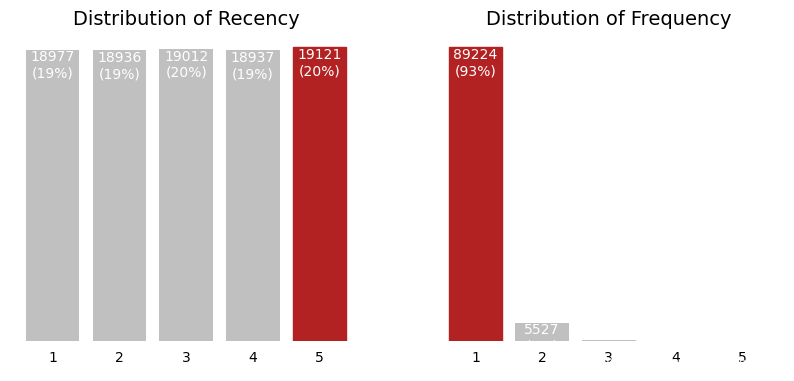

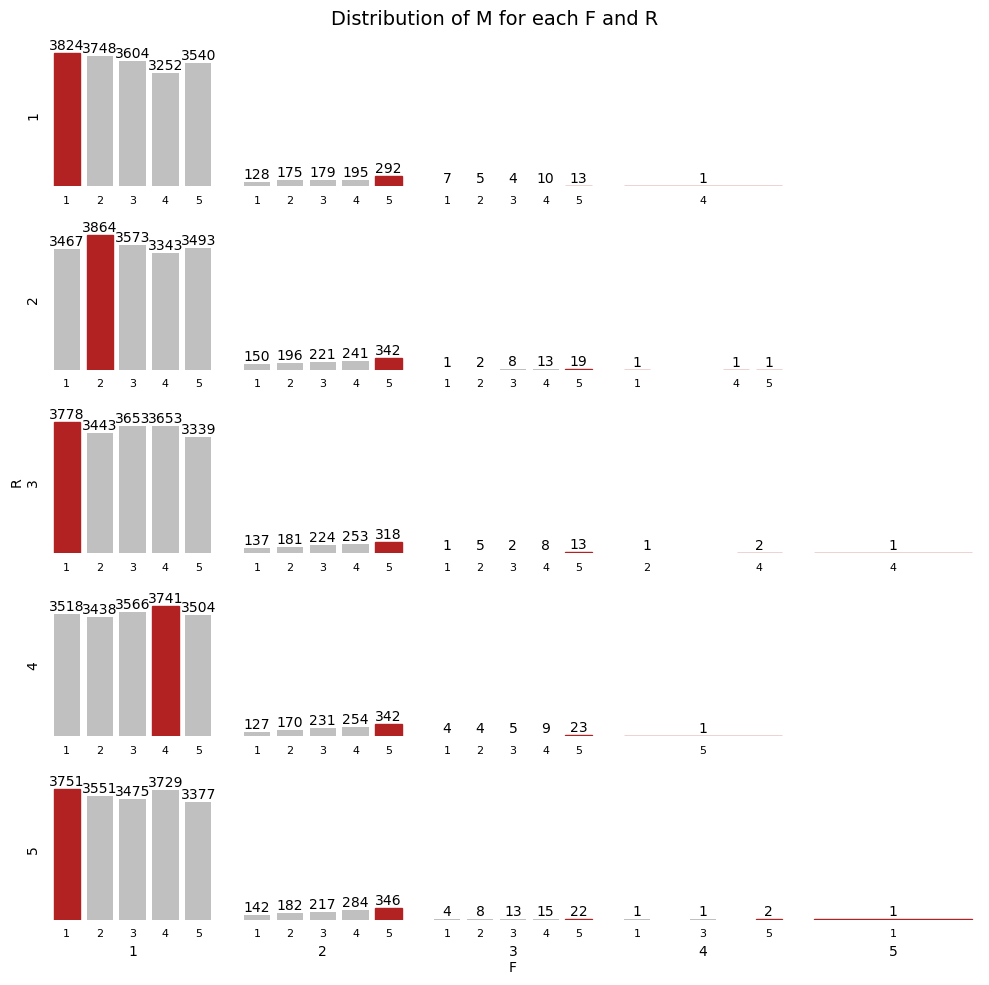

In [308]:
# Визуализирую данные
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = RFM[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = RFM[(RFM['R'] == r) & (RFM['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

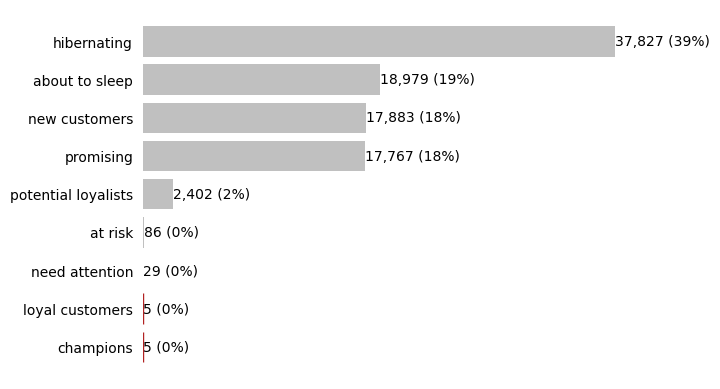

In [310]:
# Давайте посмотрим на распределение наших сегментов.
segments_counts = RFM['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

### Общий вывод:
- __Подавляющее большинство  клиентов совершают покупки не очень часто (99% клиентов имеют частоту 1 или 2).__
- __В среднем каждый месяц товар не достовляется по причине canceled(отменен) 28.1 раз, а по причине unavailable(недоступен) 29 раз.__
- __У нас много клиентов, которые не часто покупают (58 % находятся в сегментах : 'hibernating' и 'about to sleep').__
- __36% наших клиентов являются либо новыми клиентами, либо многообещающими.__
- __Всего около 2% клиентов являються лояльными.__